# Plotting data comparison between heterogeneity and template projects

## Import libraries

In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import os

## Define cell cycle model

In [7]:
# CELL CYCLE MODELS
### advanced_Ki67_cycle_model = 0
### basic_Ki67_cycle_model = 1
### flow_cytometry_cycle_model = 2
### live_apoptotic_cycle_model = 3
### total_cells_cycle_model = 4
### live_cells_cycle_model = 5 
### flow_cytometry_separated_cycle_model = 6
### cycling_quiescent_model = 7
cycle_model = 1

# data_filename = "data_Live.csv"
data_filename = "data_Ki67_Basic.csv"
# data_filename = "data_Ki67_Advanced.csv"
# data_filename = "data_Flow_Cytometry.csv"
# data_filename = "data_Separated_Flow_Cytometry.csv"

## Read data from heterogeneity (h) project

In [8]:
data = np.genfromtxt("heterogeneity/" + data_filename, dtype = float, delimiter = ',', names = True)
h_times = data["times"]

if cycle_model == 0:
    h_Ki67_negative_mean = np.stack((data["Ki67_negative_mean"],), axis = -1)
    h_Ki67_positive_premitotic_mean = np.stack((data["Ki67_positive_premitotic_mean"],), axis = -1)
    h_Ki67_positive_postmitotic_mean = np.stack((data["Ki67_positive_postmitotic_mean"],), axis = -1)
elif cycle_model == 1:
    h_Ki67_negative_mean = np.stack((data["Ki67_negative_mean"],), axis = -1)
    h_Ki67_positive_mean = np.stack((data["Ki67_positive_mean"],), axis = -1)
elif cycle_model == 2:
    h_G0G1_phase_mean = np.stack((data["G0G1_phase_mean"],), axis = -1)
    h_S_phase_mean = np.stack((data["S_phase_mean"],), axis = -1)
    h_G2M_phase_mean = np.stack((data["G2M_phase_mean"],), axis = -1)
elif cycle_model == 5:
    h_live_mean = np.stack((data["live_mean"],), axis = -1)
elif cycle_model == 6:
    h_G0G1_phase_mean = np.stack((data["G0G1_phase_mean"],), axis = -1)
    h_S_phase_mean = np.stack((data["S_phase_mean"],), axis = -1)
    h_G2_phase_mean = np.stack((data["G2_phase_mean"],), axis = -1)
    h_M_phase_mean = np.stack((data["M_phase_mean"],), axis = -1)
else:
    print("Unrecognized cell cycle model.")

h_apoptotic_mean = np.stack((data["apoptotic_mean"],), axis = -1)
h_necrotic_mean = np.stack((data["necrotic_mean"],), axis = -1)

## Read data from template (t) project

In [9]:
data = np.genfromtxt("template/" + data_filename, dtype = float, delimiter = ',', names = True)
t_times = data["times"]

if cycle_model == 0:
    t_Ki67_negative_mean = np.stack((data["Ki67_negative_mean"],), axis = -1)
    t_Ki67_positive_premitotic_mean = np.stack((data["Ki67_positive_premitotic_mean"],), axis = -1)
    t_Ki67_positive_postmitotic_mean = np.stack((data["Ki67_positive_postmitotic_mean"],), axis = -1)
elif cycle_model == 1:
    t_Ki67_negative_mean = np.stack((data["Ki67_negative_mean"],), axis = -1)
    t_Ki67_positive_mean = np.stack((data["Ki67_positive_mean"],), axis = -1)
elif cycle_model == 2:
    t_G0G1_phase_mean = np.stack((data["G0G1_phase_mean"],), axis = -1)
    t_S_phase_mean = np.stack((data["S_phase_mean"],), axis = -1)
    t_G2M_phase_mean = np.stack((data["G2M_phase_mean"],), axis = -1)
elif cycle_model == 5:
    t_live_mean = np.stack((data["live_mean"],), axis = -1)
elif cycle_model == 6:
    t_G0G1_phase_mean = np.stack((data["G0G1_phase_mean"],), axis = -1)
    t_S_phase_mean = np.stack((data["S_phase_mean"],), axis = -1)
    t_G2_phase_mean = np.stack((data["G2_phase_mean"],), axis = -1)
    t_M_phase_mean = np.stack((data["M_phase_mean"],), axis = -1)
else:
    print("Unrecognized cell cycle model.")

t_apoptotic_mean = np.stack((data["apoptotic_mean"],), axis = -1)
t_necrotic_mean = np.stack((data["necrotic_mean"],), axis = -1)

## Plot the temporal evolution of the number of tumor cells

<IPython.core.display.Javascript object>


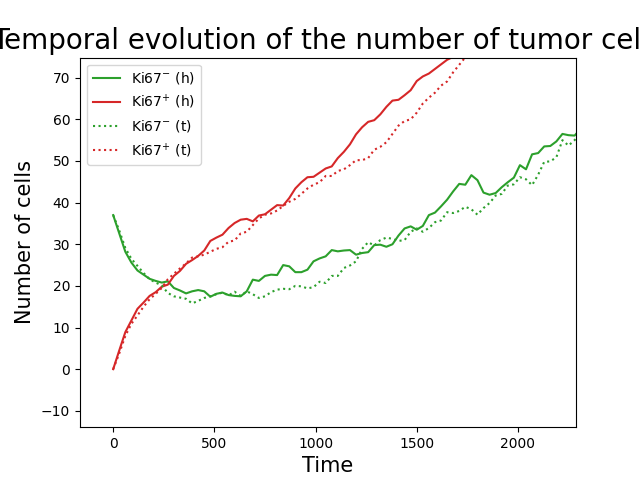

In [10]:
# plt.plot( h_times, h_apoptotic_mean , '-', label='Apoptotic (h)', color='tab:blue', alpha=1.0 ); 
# plt.plot( h_times, h_necrotic_mean , '-', label='Necrotic  (h)', color='tab:orange', alpha=1.0 ); 
if cycle_model == 0:
    plt.plot( h_times, h_Ki67_negative_mean , '-', label=r'Ki67$^{-}$ (h)', color='tab:green', alpha=1.0 );
    plt.plot( h_times, h_Ki67_positive_premitotic_mean , '-', label=r'Ki67$^{+}$ (pre) (h)', color='tab:red', alpha=1.0 );
    plt.plot( h_times, h_Ki67_positive_postmitotic_mean , '-', label=r'Ki67$^{+}$ (post) (h)', color='tab:purple', alpha=1.0 );
elif cycle_model == 1:
    plt.plot( h_times, h_Ki67_negative_mean , '-', label=r'Ki67$^{-}$ (h)', color='tab:green', alpha=1.0 );
    plt.plot( h_times, h_Ki67_positive_mean , '-', label=r'Ki67$^{+}$ (h)', color='tab:red', alpha=1.0 );
elif cycle_model == 2:
    plt.plot( h_times, h_G0G1_phase_mean , '-', label='G0/G1 (h)', color='tab:green', alpha=1.0 );
    plt.plot( h_times, h_S_phase_mean , '-', label='S (h)', color='tab:red', alpha=1.0 );
    plt.plot( h_times, h_G2M_phase_mean , '-', label='G2/M (h)', color='tab:purple', alpha=1.0 );
elif cycle_model == 5:
    plt.plot( h_times, h_live_mean , '-', label='Live (h)', color='tab:green', alpha=1.0 );
elif cycle_model == 6:
    plt.plot( h_times, h_G0G1_phase_mean , '-', label='G0/G1 (h)', color='tab:green', alpha=1.0 );
    plt.plot( h_times, h_S_phase_mean , '-', label='S (h)', color='tab:red', alpha=1.0 );
    plt.plot( h_times, h_G2_phase_mean , '-', label='G2 (h)', color='tab:purple', alpha=1.0 );
    plt.plot( h_times, h_M_phase_mean , '-', label='M (h)', color='tab:brown', alpha=1.0 );
else:
    print("Unrecognized cell cycle model.")
    
# plt.plot( t_times, t_apoptotic_mean , ':', label='Apoptotic (t)', color='tab:blue', alpha=1.0 ); 
# plt.plot( t_times, t_necrotic_mean , ':', label='Necrotic  (t)', color='tab:orange', alpha=1.0 ); 
if cycle_model == 0:
    plt.plot( t_times, t_Ki67_negative_mean , ':', label=r'Ki67$^{-}$ (t)', color='tab:green', alpha=1.0 );
    plt.plot( t_times, t_Ki67_positive_premitotic_mean , ':', label=r'Ki67$^{+}$ (pre) (t)', color='tab:red', alpha=1.0 );
    plt.plot( t_times, t_Ki67_positive_postmitotic_mean , ':', label=r'Ki67$^{+}$ (post) (t)', color='tab:purple', alpha=1.0 );
elif cycle_model == 1:
    plt.plot( t_times, t_Ki67_negative_mean , ':', label=r'Ki67$^{-}$ (t)', color='tab:green', alpha=1.0 );
    plt.plot( t_times, t_Ki67_positive_mean , ':', label=r'Ki67$^{+}$ (t)', color='tab:red', alpha=1.0 );
elif cycle_model == 2:
    plt.plot( t_times, t_G0G1_phase_mean , ':', label='G0/G1 (t)', color='tab:green', alpha=1.0 );
    plt.plot( t_times, t_S_phase_mean , ':', label='S (t)', color='tab:red', alpha=1.0 );
    plt.plot( t_times, t_G2M_phase_mean , ':', label='G2/M (t)', color='tab:purple', alpha=1.0 );
elif cycle_model == 5:
    plt.plot( t_times, t_live_mean , ':', label='Live (t)', color='tab:green', alpha=1.0 );
elif cycle_model == 6:
    plt.plot( t_times, t_G0G1_phase_mean , ':', label='G0/G1 (t)', color='tab:green', alpha=1.0 );
    plt.plot( t_times, t_S_phase_mean , ':', label='S (t)', color='tab:red', alpha=1.0 );
    plt.plot( t_times, t_G2_phase_mean , ':', label='G2 (t)', color='tab:purple', alpha=1.0 );
    plt.plot( t_times, t_M_phase_mean , ':', label='M (t)', color='tab:brown', alpha=1.0 );
else:
    print("Unrecognized cell cycle model.")
plt.legend()

plt.title( 'Temporal evolution of the number of tumor cells', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Number of cells', size=15 )
plt.savefig("data_comparison.png", bbox_inches = 'tight')